In [1]:
import os
import sys
import pandas as pd
from time import perf_counter as timeit
sys.path.append('..')
import torch
import gzip
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import alntools as aln
import alntools.density as ds

/home/users/kkaminski/anaconda3/envs/plmblast/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
example_emb = "/home/nfs/kkaminski/PLMBLST/ecod70db_20220902"

In [4]:
idquery = 25000
embeddings = torch.load(example_emb + '/emb.64')
query = embeddings[idquery]
scorelist = ds.local.chunk_score(query, embeddings, stride = 3, kernel_size = 20)

scoring embeddings: 100%|██████████| 59990/59990 [01:09<00:00, 869.03it/s] 


In [5]:
csscorelist = []
for emb in tqdm(embeddings):

    csscore = torch.nn.functional.cosine_similarity(query.sum(0), emb.sum(0), dim=0).item()
    csscorelist.append(csscore)

100%|██████████| 59990/59990 [00:01<00:00, 36033.07it/s]


In [6]:
emb.shape, query.shape

(torch.Size([800, 64]), torch.Size([129, 64]))

(array([0.0000e+00, 5.2000e+01, 6.5410e+03, 3.2543e+04, 1.7893e+04,
        2.5590e+03, 2.8500e+02, 3.0000e+01, 1.5000e+01, 2.2000e+01,
        1.8000e+01, 1.5000e+01, 2.0000e+00, 4.0000e+00, 4.0000e+00,
        4.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
        1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
        1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95]),
 <BarContainer object of 39 artists>)

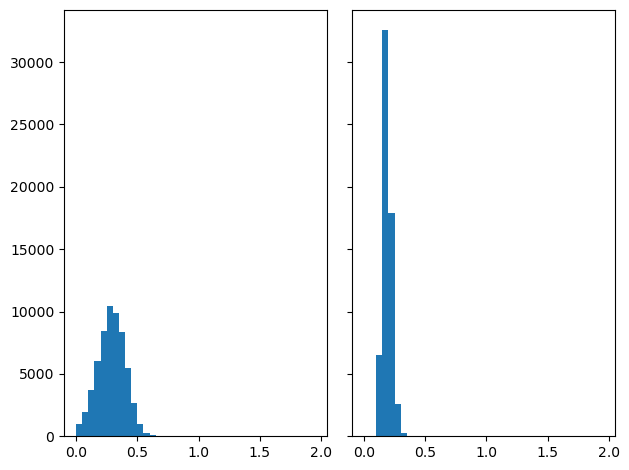

In [7]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
nbins = np.arange(0, 2, 0.05)
# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(csscorelist, bins=nbins)
axs[1].hist(scorelist, bins=nbins)

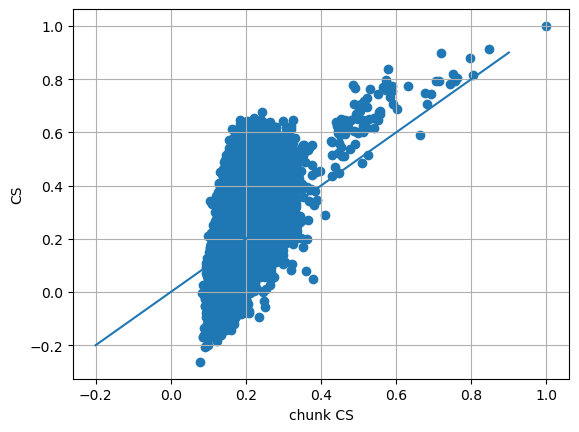

In [11]:
plt.scatter(x = scorelist, y= csscorelist)
plt.grid()
plt.xlabel('chunk CS')
plt.ylabel('CS')
plt.plot(np.arange(-0.2, 1, 0.1), np.arange(-0.2, 1, 0.1))

In [ ]:

x = torch.rand((1, 1, 100, 64))
out = torch.nn.functional.unfold(x, (20, 64), (3, 1))

In [ ]:
out = out.squeeze(0)
out_norm = out.pow(2).sum(1).sqrt()

In [ ]:
out_norm.min()

tensor(2.9005)